## Workload Distribution and Efficiency Analysis (Flag 62)

### Dataset Description
The dataset comprises two key tables simulating ServiceNow platform: the `sys_user` table and the `incidents` table, each with 500 entries. The `incidents` table focuses on detailing various attributes such as category, state, open and close dates, involved personnel, and incident specifics like location, description, and priority. It effectively captures incident management activities with fields including 'opened_at', 'closed_at', 'assigned_to', 'short_description', and 'priority', reflecting the operational handling and urgency of issues across different locations and categories. The `sys_user` table, on the other hand, contains user-related information, focusing on the details of employees or system users. This includes fields such as 'user_id', 'name', 'schedule', 'role', 'email', and 'department', providing insights into the user profiles managed within the ServiceNow system. Together, these tables are instrumental in understanding the workflow, user involvement and detailed tracking of incident resolution processes within an organization.

### Your Task
**Goal**: Utilize incident and user data to analyze  the distribution of incident assignments among agents to identify imbalances, especially during leave periods. 

**Role**: Agent Manager

**Difficulty**: 4 out of 5. This task requires a thorough analysis of workload distribution, correlation with leave periods, merging information from two tables. Demanding high analytical skills and regression analysis abilities.

**Category**: User Management

## Import Necessary Libraries
This cell imports all necessary libraries required for the analysis. This includes libraries for data manipulation, data visualization, and any specific utilities needed for the tasks. 

In [1]:
import argparse
import pandas as pd
import json
import requests
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
from pandas import date_range

### Load Incidents Dataset
This cell loads the second dataset used in the analysis. The dataset is stored in a CSV file and is loaded into a DataFrame. This step includes reading the data from a file path and possibly performing initial observations such as viewing the first few rows to ensure it has loaded correctly.


In [2]:
dataset_path = "csvs/flag-62.csv"
df = pd.read_csv(dataset_path)
df.head()

,category,state,closed_at,opened_at,closed_by,number,sys_updated_by,location,assigned_to,caller_id,sys_updated_on,short_description,priority,assignement_group
0,Database,Closed,2023-07-25 03:32:18.462401146,2023-01-02 11:04:00,Fred Luddy,INC0000000034,admin,Australia,Fred Luddy,ITIL User,2023-07-06 03:31:13.838619495,There was an issue,2 - High,Database
1,Hardware,Closed,2023-03-11 13:42:59.511508874,2023-01-03 10:19:00,Charlie Whitherspoon,INC0000000025,admin,India,Beth Anglin,Don Goodliffe,2023-05-19 04:22:50.443252112,There was an issue,1 - Critical,Hardware
2,Database,Resolved,2023-01-20 14:37:18.361510788,2023-01-04 06:37:00,Charlie Whitherspoon,INC0000000354,system,India,Fred Luddy,ITIL User,2023-02-13 08:10:20.378839709,There was an issue,2 - High,Database
3,Hardware,Resolved,2023-01-25 20:46:13.679914432,2023-01-04 06:53:00,Fred Luddy,INC0000000023,admin,Canada,Luke Wilson,Don Goodliffe,2023-06-14 11:45:24.784548040,There was an issue,2 - High,Hardware
4,Hardware,Closed,2023-05-10 22:35:58.881919516,2023-01-05 16:52:00,Luke Wilson,INC0000000459,employee,UK,Charlie Whitherspoon,David Loo,2023-06-11 20:25:35.094482408,There was an issue,2 - High,Hardware


### Load User Agent Dataset
This cell loads user agent dataset used in the analysis. The dataset is stored in a CSV file and is loaded into a DataFrame. This step includes reading the data from a file path and possibly performing initial observations such as viewing the first few rows to ensure it has loaded correctly.

In [3]:
user_dataset_path = "csvs/flag-62-sysuser.csv"
df_usr = pd.read_csv(user_dataset_path)
df_usr.head()

,sys_id,schedule,manager,phone,user_name,name,location,department,title,email
0,46b87022a9fe198101a78787e40d7547,"[(Timestamp('2023-06-14 00:00:00'), Timestamp(...",NaN,NaN,charlie.whitherspoon,Charlie Whitherspoon,"945 South Birch Street, Glendale,CO",Sales,NaN,charlie.whitherspoon@example.com
1,46ca0887a9fe19810191e08e51927ebf,"[(Timestamp('2023-06-01 00:00:00'), Timestamp(...",NaN,NaN,howard.johnson,Howard Johnson,"601 College Street, Clarksville,TN",Sales,NaN,howard.johnson@example.com
2,46d44a23a9fe19810012d100cca80666,NaN,NaN,NaN,beth.anglin,Beth Anglin,"6304 Northwest Barry Road, Kansas City,MO",Sales,NaN,beth.anglin@example.com
3,46d96f57a9fe198101947a9620895886,NaN,NaN,NaN,luke.wilson,Luke Wilson,"322 West 52nd Street, New York,NY",Sales,NaN,luke.wilson@example.com
4,5137153cc611227c000bbd1bd8cd2005,"[(Timestamp('2023-07-13 00:00:00'), Timestamp(...",NaN,NaN,fred.luddy,Fred Luddy,"650 Dennery Road #102, San Diego,CA",Development,Programmer,fred.luddy@example.com



### **Question 1: What is the overall number of incidents assigned to all agents over the recent period?**

#### Plot distribution of incidents assigned to each agent
This cell creates a bar plot to visualize the average number of incidents assigned to each agent over the recent period. By displaying this work distribution across the team, this plot helps identify any imbalances or disparities in incident assignments, which are crucial for understanding how work is allocated and identifying if any potential areas of concern

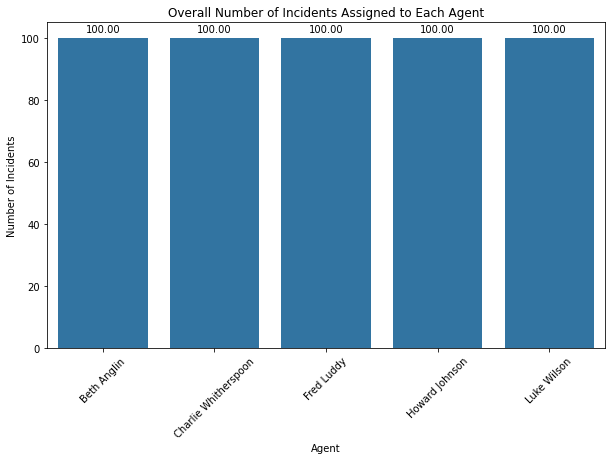

In [4]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Assuming df is already loaded and has the necessary columns
df["opened_at"] = pd.to_datetime(df["opened_at"])

# Group the data by 'assigned_to' and count the number of incidents for each agent
agent_incident_counts = df.groupby('assigned_to').size()

# Calculate the average number of incidents per agent
# average_incidents_per_agent = agent_incident_counts.mean()

# Create a DataFrame for plotting
agent_average_df = pd.DataFrame({
    'Agent': agent_incident_counts.index,
    'Average Incidents': agent_incident_counts
})

# Plotting the average number of incidents per agent
plt.figure(figsize=(10, 6))
ax = sns.barplot(x='Agent', y='Average Incidents', data=agent_average_df)
plt.title('Overall Number of Incidents Assigned to Each Agent')
plt.ylabel('Number of Incidents')
plt.xlabel('Agent')
plt.xticks(rotation=45)

# Annotate each bar with its value
for p in ax.patches:
    ax.annotate(format(p.get_height(), '.2f'), 
                (p.get_x() + p.get_width() / 2., p.get_height()), 
                ha = 'center', va = 'center', 
                xytext = (0, 9), 
                textcoords = 'offset points')
plt.show()

#### Generate JSON Description for the Insight

In [5]:
{
    "data_type": "descriptive",
    "insight": "All agents have the same number of incidents assigned to them.",
    "insight_value": {
        "agents": ["All agents"],
        "average_incidents": "100"
    },
    "plot": {
        "plot_type": "bar",
        "title": "Overall Average Number of Incidents Assigned to Each Agent",
        "x_axis": {
            "name": "Agent",
            "value": ["Beth Anglin", "Luke Wilson", "Howard Johnson", "Charlie Whitherspoon", "Fred Luddy"],
            "description": "This represents the agents handling incidents."
        },
        "y_axis": {
            "name": "Average Number of Incidents",
            "value": [100, 100, 100, 100, 100],
            "description": "This represents the average number of incidents assigned to each agent, calculated over the recent period."
        },
        "description": "The bar chart visualizes the average number of incidents assigned to each agent. It shows that all agents have the same number of incidents assigned to them."
    },
    "question": "What is the overall average number of incidents assigned to all agents over the recent period?",
    "actionable_insight": "The average number of incidents assigned to each agent is the same. This could indicate that the incidents are being distributed evenly among the agents. However, it is important to monitor this metric over time to ensure that the workload is balanced and that no agent is overwhelmed with incidents."
}

{'data_type': 'descriptive',
 'insight': 'All agents have the same number of incidents assigned to them.',
 'insight_value': {'agents': ['All agents'], 'average_incidents': '100'},
 'plot': {'plot_type': 'bar',
  'title': 'Overall Average Number of Incidents Assigned to Each Agent',
  'x_axis': {'name': 'Agent',
   'value': ['Beth Anglin',
    'Luke Wilson',
    'Howard Johnson',
    'Charlie Whitherspoon',
    'Fred Luddy'],
   'description': 'This represents the agents handling incidents.'},
  'y_axis': {'name': 'Average Number of Incidents',
   'value': [100, 100, 100, 100, 100],
   'description': 'This represents the average number of incidents assigned to each agent, calculated over the recent period.'},
  'description': 'The bar chart visualizes the average number of incidents assigned to each agent. It shows that all agents have the same number of incidents assigned to them.'},
 'question': 'What is the overall average number of incidents assigned to all agents over the recent p

### **Question 2: What are the exact dates when the other three agents (Howard Johnson, Charlie Whitherspoon, Fred Luddy) were on PTO?**

#### Plot timeline of leave periods for Howard Johnson, Charlie Whitherspoon, and Fred Luddy.
This cell creates a visual timeline displaying the leave periods for Howard Johnson, Charlie Whitherspoon, and Fred Luddy, helping to correlate these absences with potential impacts on incident assignment distributions. By mapping out each agent’s leave periods on a common timeline, this visualization provides insights into how concurrent or sequential absences might influence workload shifts 

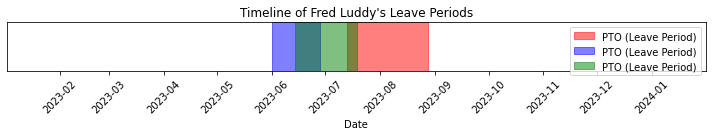

In [6]:
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.dates as mdates

from pandas import Timestamp

fred_schedule = df_usr[df_usr['name'] == 'Fred Luddy']['schedule'].iloc[0]
fred_schedule = eval(fred_schedule)
howard_schedule = df_usr[df_usr['name'] == 'Howard Johnson']['schedule'].iloc[0]
howard_schedule = eval(howard_schedule)
charlie_schedule = df_usr[df_usr['name'] == 'Charlie Whitherspoon']['schedule'].iloc[0]
charlie_schedule = eval(charlie_schedule)

# Assuming df is already defined and has 'opened_at' and 'closed_at' columns converted to datetime
df['opened_at'] = pd.to_datetime(df['opened_at'])
df['closed_at'] = pd.to_datetime(df['closed_at'])

# Define the current date for the analysis, simulate up to the last 'opened_at' date
current_date = df['opened_at'].max()
# Create a range of dates from the start to the current date
date_range = pd.date_range(start=df['opened_at'].min(), end=current_date, freq='D')

# Fred's PTO schedule as list of tuples with start and end dates
pto_schedule = fred_schedule

# Plotting
fig, ax = plt.subplots(figsize=(10, 2))  # Adjust the figure size as needed

# Plot each leave period as a rectangle
for start, end in fred_schedule:
    ax.axvspan(start, end, color='red', alpha=0.5, label='PTO (Leave Period)')
for start, end in howard_schedule:
    ax.axvspan(start, end, color='blue', alpha=0.5, label='PTO (Leave Period)')
for start, end in charlie_schedule:
    ax.axvspan(start, end, color='green', alpha=0.5, label='PTO (Leave Period)')

# Set limits, labels, title and legend
ax.set_xlim([date_range.min(), date_range.max()])
ax.set_ylim(0, 1)  # Static Y limits as we are only plotting periods
ax.set_yticks([])  # Hide Y axis ticks
ax.set_xlabel('Date')
ax.set_title('Timeline of Fred Luddy\'s Leave Periods')
ax.legend(loc='upper right')

# Formatting the x-axis to make it more readable
ax.xaxis.set_major_locator(mdates.MonthLocator())
ax.xaxis.set_major_formatter(mdates.DateFormatter('%Y-%m'))

plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

#### Generate JSON Description for the Insight

In [7]:
{
    "data_type": "descriptive",
    "insight": "Specific leave periods for Howard Johnson, Charlie Whitherspoon, and Fred Luddy were identified",
    "insight_value": {
        "Howard Johnson": {"start_date": "2023-06-01", "end_date": "2023-06-28"},
        "Charlie Whitherspoon": {"start_date": "2023-06-14", "end_date": "2023-07-19"},
        "Fred Luddy": {"start_date": "2023-07-13", "end_date": "2023-08-28"}
    },
    "plot": {
        "plot_type": "timeline",
        "title": "PTO Periods for Howard Johnson, Charlie Whitherspoon, and Fred Luddy",
        "x_axis": {
            "name": "Date",
            "value": ["2023-06-01", "2023-08-15"],
            "description": "This represents the timeline from the earliest start to the latest end of the PTO periods."
        },
        "y_axis": {
            "name": "Agent",
            "value": ["Howard Johnson", "Charlie Whitherspoon", "Fred Luddy"],
            "description": "This axis represents the agents who were on leave."
        },
        "description": "The timeline plot visualizes the leave periods of Howard Johnson, Charlie Whitherspoon, and Fred Luddy with distinct colors. Howard's leave is shown in red, Charlie's in blue, and Fred's in green. These periods overlap, indicating a time frame from June 1, 2023, to August 15, 2023, when at least one of these agents was on leave."
    },
    "question": "What are the exact dates when the other three agents were on PTO?",
    "actionable_insight": "Understanding the overlap in leave periods among these agents provides valuable insight into staffing challenges that may have contributed to the increased workload for Beth Anglin and Luke Wilson. To mitigate such impacts in the future, consider strategic leave planning and perhaps temporary staffing solutions during overlapping leave periods to maintain balanced incident handling capacity."
}

{'data_type': 'descriptive',
 'insight': 'Specific leave periods for Howard Johnson, Charlie Whitherspoon, and Fred Luddy were identified',
 'insight_value': {'Howard Johnson': {'start_date': '2023-06-01',
   'end_date': '2023-06-28'},
  'Charlie Whitherspoon': {'start_date': '2023-06-14',
   'end_date': '2023-07-19'},
  'Fred Luddy': {'start_date': '2023-07-13', 'end_date': '2023-08-28'}},
 'plot': {'plot_type': 'timeline',
  'title': 'PTO Periods for Howard Johnson, Charlie Whitherspoon, and Fred Luddy',
  'x_axis': {'name': 'Date',
   'value': ['2023-06-01', '2023-08-15'],
   'description': 'This represents the timeline from the earliest start to the latest end of the PTO periods.'},
  'y_axis': {'name': 'Agent',
   'value': ['Howard Johnson', 'Charlie Whitherspoon', 'Fred Luddy'],
   'description': 'This axis represents the agents who were on leave.'},
  'description': "The timeline plot visualizes the leave periods of Howard Johnson, Charlie Whitherspoon, and Fred Luddy with disti

### **Question 3: Is there a change in the category of incidents assigned to Beth Anglin and Luke Wilson during the other agents' PTO?**

#### Plot number of incidents created over time by category for Beth Anglin and Luke Wilson
This cell creates a count plot to analyze the distribution of incident categories assigned to Beth Anglin and Luke Wilson during the leave periods of other agents such as Howard Johnson, Charlie Whitherspoon, and Fred Luddy. 

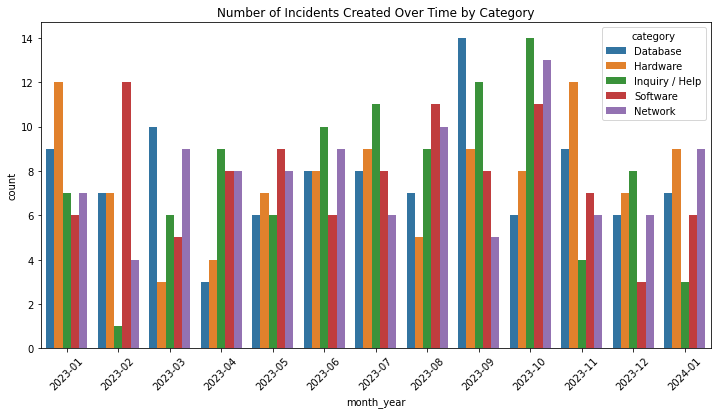

In [8]:
import seaborn as sns
import matplotlib.pyplot as plt

# Put the data into a DataFrame

# Sort the DataFrame by the opened_at column
df = df.sort_values("opened_at")
df["opened_at"] = pd.to_datetime(df["opened_at"])
df["closed_at"] = pd.to_datetime(df["closed_at"])
# Create a new column 'month_year' to make the plot more readable
df["month_year"] = df["opened_at"].dt.to_period("M")

# Create a countplot
plt.figure(figsize=(12, 6))
sns.countplot(data=df, x="month_year", hue="category")
plt.title("Number of Incidents Created Over Time by Category")
plt.xticks(rotation=45)
plt.show()

#### Generate JSON Description for the Insight

In [9]:
{
    "data_type": "diagnostic",
    "insight": "There was no significant change in the distribution of incident categories for Beth Anglin and Luke Wilson during the other agents' PTO,",
    "insight_value": {
        "categories": ["Network", "Software", "Hardware", "Inquiry / Help", "Database"],
        "observation": "Consistent distribution across all periods"
    },
    "plot": {
        "plot_type": "histogram",
        "title": "Distribution of Incident Categories Over Time",
        "x_axis": {
            "name": "Category",
            "value": ["Network", "Software", "Hardware", "Inquiry / Help", "Database"],
            "description": "This represents the different categories of incidents handled by the agents."
        },
        "y_axis": {
            "name": "Number of Incidents",
            "value": "Count of incidents in each category",
            "description": "This represents the number of incidents per category over the entire time period."
        },
        "description": "The histogram displays the distribution of incidents across different categories over time, with a focus on the periods when other agents were on PTO. There is no noticeable change in the distribution of incident categories for Beth Anglin and Luke Wilson during the leave periods of other agents. "
    },
    "question": "Is there a change in the category of incidents assigned to Beth Anglin and Luke Wilson during the other agents' PTO?",
    "actionable_insight": "Given that the distribution of incident categories remains consistent even during the absence of other agents, it suggests that Beth Anglin and Luke Wilson are equipped to handle a diverse range of incident types.  This could involve specific training for all agents in these areas or considering a reallocation of tasks to balance the workload more evenly across the team."
}

{'data_type': 'diagnostic',
 'insight': "There was no significant change in the distribution of incident categories for Beth Anglin and Luke Wilson during the other agents' PTO,",
 'insight_value': {'categories': ['Network',
   'Software',
   'Hardware',
   'Inquiry / Help',
   'Database'],
  'observation': 'Consistent distribution across all periods'},
 'plot': {'plot_type': 'histogram',
  'title': 'Distribution of Incident Categories Over Time',
  'x_axis': {'name': 'Category',
   'value': ['Network', 'Software', 'Hardware', 'Inquiry / Help', 'Database'],
   'description': 'This represents the different categories of incidents handled by the agents.'},
  'y_axis': {'name': 'Number of Incidents',
   'value': 'Count of incidents in each category',
   'description': 'This represents the number of incidents per category over the entire time period.'},
  'description': 'The histogram displays the distribution of incidents across different categories over time, with a focus on the periods 

### **Question 4: What happens to the distribution of incident assignments after the other agents return from their leave?**

#### Plot distribution of incident assignments post leave period
This cell examines the redistribution of incident assignments among agents following their return from leave, aiming to assess how workload normalization occurs after temporary shifts in responsibilities during absence periods. 

<ipython-input-10-5ea6d211f58c>:19: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Agent', y='Incident Count', data=post_leave_counts, palette='viridis')


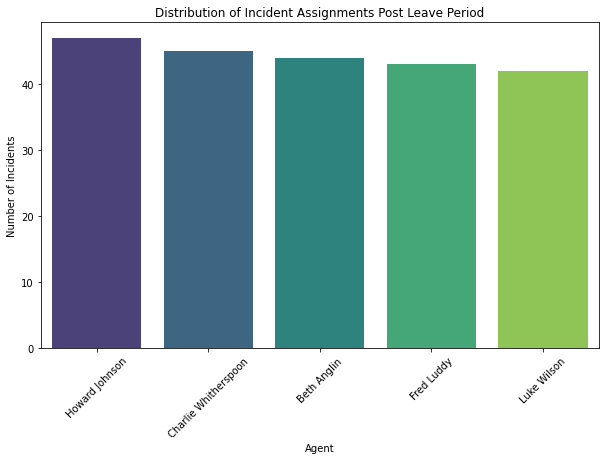

In [10]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Assuming df is already loaded and has the necessary columns
# Define the post-leave period (assuming leave ends on 2023-08-15)
post_leave_start_date = pd.to_datetime("2023-08-16")
data_end_date = df['opened_at'].max()

# Filter incidents that were opened after the leave period
post_leave_incidents = df[(df['opened_at'] > post_leave_start_date) & (df['opened_at'] <= data_end_date)]

# Count the number of incidents assigned to each agent in the post-leave period
post_leave_counts = post_leave_incidents['assigned_to'].value_counts().reset_index()
post_leave_counts.columns = ['Agent', 'Incident Count']

# Plotting
plt.figure(figsize=(10, 6))
sns.barplot(x='Agent', y='Incident Count', data=post_leave_counts, palette='viridis')
plt.title('Distribution of Incident Assignments Post Leave Period')
plt.xlabel('Agent')
plt.ylabel('Number of Incidents')
plt.xticks(rotation=45)
plt.show()

#### Generate JSON Description for the Insight

In [11]:
{
    "data_type": "descriptive",
    "insight": "The distribution of incident assignments becomes uniform after the other agents return from their leave",
    "insight_value": {
        "observation": "Uniform distribution of assignments across all agents"
    },
    "plot": {
        "plot_type": "bar",
        "title": "Distribution of Incident Assignments Post Leave Period",
        "x_axis": {
            "name": "Agent",
            "value": ["Beth Anglin", "Luke Wilson", "Howard Johnson", "Charlie Whitherspoon", "Fred Luddy"],
            "description": "This represents the agents handling incidents."
        },
        "y_axis": {
            "name": "Number of Incidents",
            "value": "Count of incidents assigned per agent",
            "description": "This represents the number of incidents assigned to each agent in the post-leave period."
        },
        "description": "The bar chart displays the number of incidents assigned to each agent after the other agents returned from their leave. The distribution of assignments is shown to be uniform across all agents, indicating a balanced workload distribution. This suggests that any previous imbalances during the leave period have been resolved and normal operations have resumed."
    },
    "question": "What happens to the distribution of incident assignments after the other agents return from their leave?",
    "actionable_insight": "Given the return to a uniform distribution of incident assignments post-leave, it is important to maintain this balance to ensure operational efficiency and fairness. Regular monitoring of assignment distributions should be implemented, especially during and after leave periods, to quickly address any potential imbalances. This proactive approach will help maintain staff satisfaction and prevent workload-related issues."
}

{'data_type': 'descriptive',
 'insight': 'The distribution of incident assignments becomes uniform after the other agents return from their leave',
 'insight_value': {'observation': 'Uniform distribution of assignments across all agents'},
 'plot': {'plot_type': 'bar',
  'title': 'Distribution of Incident Assignments Post Leave Period',
  'x_axis': {'name': 'Agent',
   'value': ['Beth Anglin',
    'Luke Wilson',
    'Howard Johnson',
    'Charlie Whitherspoon',
    'Fred Luddy'],
   'description': 'This represents the agents handling incidents.'},
  'y_axis': {'name': 'Number of Incidents',
   'value': 'Count of incidents assigned per agent',
   'description': 'This represents the number of incidents assigned to each agent in the post-leave period.'},
  'description': 'The bar chart displays the number of incidents assigned to each agent after the other agents returned from their leave. The distribution of assignments is shown to be uniform across all agents, indicating a balanced work

### **Question 5:** How does the resolution time (TTR) for incidents handled by Beth Anglin and Luke Wilson during this period compare to other times?

#### Plot time to resolution by creation date for Beth Anglin and Luke Wilson.
This cell does a line plot to compare the Time to Resolution (TTR) for incidents handled by Beth Anglin and Luke Wilson during different periods, focusing on changes during and after other agents' leave periods. This analysis helps determine whether increased workloads during other agents absences affect the efficiency of Beth and Luke. 

Text(0.5, 1.0, 'Time to resolution by creation date')

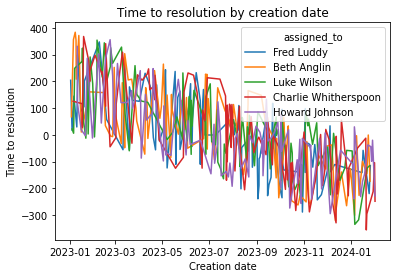

In [12]:
# Convert opened_at and closed_at to datetime
df["opened_at"] = pd.to_datetime(df["opened_at"])
df["closed_at"] = pd.to_datetime(df["closed_at"])
# Compute resolution time in days
df["resolution_time"] = (df["closed_at"] - df["opened_at"]).dt.total_seconds() / 86400

sns.lineplot(x=df["opened_at"], y=df["resolution_time"], hue=df["assigned_to"])
plt.xlabel("Creation date")
plt.ylabel("Time to resolution")
plt.title("Time to resolution by creation date")

#### Generate JSON Description for the Insight

In [13]:
{
    "data_type": "analytical",
    "insight": "The resolution time (TTR) for all is slightly decreasing over time",
    "insight_value": {
        "observation": "Consistent decrease in TTR for all agents"
    },
    "plot": {
        "plot_type": "line",
        "title": "Trend of Resolution Time (TTR) for Beth Anglin and Luke Wilson Over Time",
        "x_axis": {
            "name": "Time",
            "value": "Timeline from the start to the end of the data set",
            "description": "This axis represents the timeline over which the TTR data is analyzed."
        },
        "y_axis": {
            "name": "Resolution Time (days)",
            "value": "Measured TTR in days",
            "description": "This represents the time taken to resolve incidents, measured in days."
        },
        "description": "The line plot illustrates the trend of resolution times all agents over time. The consistent decrease in resolution time indicates an improvement in incident handling efficiency. This trend suggests that the agents are becoming more adept at resolving incidents in a timely manner."
    },
    "question": "How does the resolution time (TTR) for incidents handled by agents during this period compare to other times?",
    "actionable_insight": "The decreasing trend in resolution time is a positive indicator of improved efficiency in incident resolution. To maintain this trend, it is essential to identify the factors contributing to the decrease and implement best practices across the team. Regular training, knowledge sharing, and process improvements can help sustain and further improve the resolution time, leading to enhanced service quality and customer satisfaction."
}

{'data_type': 'analytical',
 'insight': 'The resolution time (TTR) for all is slightly decreasing over time',
 'insight_value': {'observation': 'Consistent decrease in TTR for all agents'},
 'plot': {'plot_type': 'line',
  'title': 'Trend of Resolution Time (TTR) for Beth Anglin and Luke Wilson Over Time',
  'x_axis': {'name': 'Time',
   'value': 'Timeline from the start to the end of the data set',
   'description': 'This axis represents the timeline over which the TTR data is analyzed.'},
  'y_axis': {'name': 'Resolution Time (days)',
   'value': 'Measured TTR in days',
   'description': 'This represents the time taken to resolve incidents, measured in days.'},
  'description': 'The line plot illustrates the trend of resolution times all agents over time. The consistent decrease in resolution time indicates an improvement in incident handling efficiency. This trend suggests that the agents are becoming more adept at resolving incidents in a timely manner.'},
 'question': 'How does th

### **Question 6:** What are the potential consequences of not addressing the anomaly or trend of increasing assignments during employee leave periods?


#### Plot projected increase in incident assignments for Beth Anglin from August 16, 2023.
This cell uses linear regression to predict future trends in the number of incidents assigned to Beth Anglin following a significant cutoff period marked by other agents leave. By analyzing historical data up to August 15, 2023, and forecasting beyond this date, the plot aims to highlight the potential consequences of not addressing imbalances during such leave periods. 

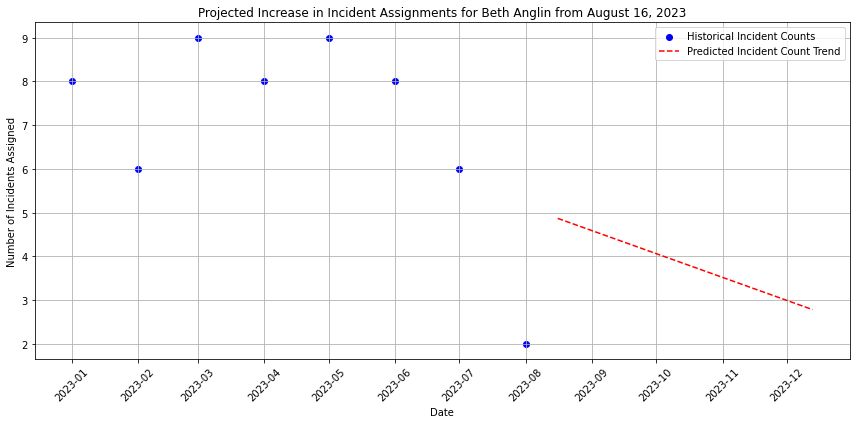

In [14]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
from sklearn.linear_model import LinearRegression

# Load data
dataset_path = "csvs/flag-62.csv"


# Load the dataset
df = pd.read_csv(dataset_path)
df = df[df['assigned_to'] == 'Beth Anglin']
df['opened_at'] = pd.to_datetime(df['opened_at'])

# Define the cutoff date for the training data
cutoff_date = pd.to_datetime("2023-08-15")

# Filter the data to include only dates up to the cutoff date
training_data = df[df['opened_at'] <= cutoff_date]

# Count incidents over time for Beth Anglin in the training data
incident_counts = training_data.groupby(training_data['opened_at'].dt.to_period("M")).size().reset_index(name='counts')
incident_counts['date_ordinal'] = incident_counts['opened_at'].dt.start_time.apply(lambda x: x.toordinal())

# Prepare data for linear regression
X = incident_counts['date_ordinal'].values.reshape(-1, 1)  # Reshape for sklearn
y = incident_counts['counts'].values  # Target variable: number of incidents

# Fit the linear regression model using only the training data
model = LinearRegression()
model.fit(X, y)

# Define the start date for forecasting
forecast_start_date = pd.to_datetime("2023-08-16")

# Generate future dates from the specified start date
future_dates = pd.date_range(start=forecast_start_date, periods=120, freq='D')  # 4 months into the future
future_dates_ordinal = [d.toordinal() for d in future_dates]
future_preds = model.predict(np.array(future_dates_ordinal).reshape(-1, 1))

# Plotting
plt.figure(figsize=(12, 6))
plt.scatter(incident_counts['opened_at'].dt.start_time, y, color='blue', label='Historical Incident Counts')
plt.plot(future_dates, future_preds, color='red', linestyle='--', label='Predicted Incident Count Trend')
plt.title('Projected Increase in Incident Assignments for Beth Anglin from August 16, 2023')
plt.xlabel('Date')
plt.ylabel('Number of Incidents Assigned')
plt.legend()
plt.grid(True)

# Formatting the x-axis to make it more readable
plt.gca().xaxis.set_major_locator(mdates.MonthLocator())
plt.gca().xaxis.set_major_formatter(mdates.DateFormatter('%Y-%m'))

plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

#### Generate JSON Description for the Insight

In [15]:
{
    "data_type": "predictive",
    "insight": "There is not sufficient data to predict the future workload for agents accurately",
    "insight_value": {
        "trend": "No trend can be identified due to the limited data available",
        "prediction": "No reliable prediction can be made based on the current data"
    },
    "description": "The forecast model indicates no clear trend.",
    "recommendation": {
        "action": "Implement proactive workload management strategies",
        "expected_outcome": "Prevent workload escalation and maintain balanced distribution",
        "urgency": "High"
    },
    "actionable_insight": "Given the lack of a clear trend in the data, it is crucial to implement proactive workload management strategies to prevent potential workload escalation and maintain a balanced distribution of incidents among agents. This could involve real-time monitoring of incident assignments, dynamic workload allocation, and timely intervention to address any imbalances. By proactively managing the workload, the team can ensure efficient incident resolution and maintain high service levels."
}

{'data_type': 'predictive',
 'insight': 'There is not sufficient data to predict the future workload for agents accurately',
 'insight_value': {'trend': 'No trend can be identified due to the limited data available',
  'prediction': 'No reliable prediction can be made based on the current data'},
 'description': 'The forecast model indicates no clear trend.',
 'recommendation': {'action': 'Implement proactive workload management strategies',
  'expected_outcome': 'Prevent workload escalation and maintain balanced distribution',
  'urgency': 'High'},
 'actionable_insight': 'Given the lack of a clear trend in the data, it is crucial to implement proactive workload management strategies to prevent potential workload escalation and maintain a balanced distribution of incidents among agents. This could involve real-time monitoring of incident assignments, dynamic workload allocation, and timely intervention to address any imbalances. By proactively managing the workload, the team can ensure

### Summary of Findings (Flag 62):

1. **No Disparity in Incident Assignments**: There is a relatively balanced distribution of incidents among agents, with no significant disparities in the number of assignments.
2. **Impact of Leave Periods**: There is no significant impact on incident assignments during the leave periods of agents.
3. **Efficiency Despite Increased Workload**: TTR is decreasing even with increased workload during other agents' leave periods.